#### import the things

In [116]:
import os
import json
import collections

from datetime import datetime
import matplotlib.pyplot as plt

#### load and look at the data

In [2]:
with open("logins.json", 'r') as l:
    logins = json.load(l)

In [4]:
logins.keys()

dict_keys(['login_time'])

In [120]:
logins['login_time'][:10]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52']

#### turn the strings into datetime objects

In [8]:
dt_format = "%Y-%m-%d %H:%M:%S"

In [12]:
login_times = [datetime.strptime(time, dt_format) for time in logins['login_time']]

#### check for repeats

In [119]:
collections.Counter(login_times).most_common(10)

[(datetime.datetime(1970, 1, 6, 21, 45, 52), 3),
 (datetime.datetime(1970, 1, 9, 1, 31, 25), 3),
 (datetime.datetime(1970, 2, 12, 11, 16, 53), 3),
 (datetime.datetime(1970, 2, 24, 23, 9, 57), 3),
 (datetime.datetime(1970, 3, 14, 17, 45, 52), 3),
 (datetime.datetime(1970, 3, 17, 1, 1, 39), 3),
 (datetime.datetime(1970, 3, 29, 3, 24, 57), 3),
 (datetime.datetime(1970, 4, 4, 1, 17, 40), 3),
 (datetime.datetime(1970, 4, 12, 4, 3, 15), 3),
 (datetime.datetime(1970, 1, 2, 10, 59, 52), 2)]

In [122]:
len([item for item, count in collections.Counter(login_times).items() if count > 1])

868

In [123]:
len(login_times)

93142

less than 1% are duplicates. There's no explanation given for what these are logins for/from. I'm going to assume that a "specific geographic location" means a singular location that would not allow for duplicated timestamps (ie two people can't log in at the exact same moment), so the duplicates must be a recording error.

In [125]:
login_times = list(set(login_times))

In [126]:
len(login_times)

92265

It doesn't specify whether or not to use only python's built in functions. But since we're dealing with timeseries, I'm going to assume pandas and Numpy are acceptable.

In [127]:
import pandas as pd
import numpy as np

In [131]:
first_day = min(login_times).date()
first_day

datetime.date(1970, 1, 1)

In [140]:
last_day = max(login_times)
last_day

datetime.datetime(1970, 4, 13, 18, 57, 38)

In [142]:
last_day = last_day.replace(day=last_day.day+1, hour=0, minute=0, second=0)
last_day

datetime.datetime(1970, 4, 14, 0, 0)

In [143]:
bins = pd.date_range(first_day, last_day, freq="15min")
bins

DatetimeIndex(['1970-01-01 00:00:00', '1970-01-01 00:15:00',
               '1970-01-01 00:30:00', '1970-01-01 00:45:00',
               '1970-01-01 01:00:00', '1970-01-01 01:15:00',
               '1970-01-01 01:30:00', '1970-01-01 01:45:00',
               '1970-01-01 02:00:00', '1970-01-01 02:15:00',
               ...
               '1970-04-13 21:45:00', '1970-04-13 22:00:00',
               '1970-04-13 22:15:00', '1970-04-13 22:30:00',
               '1970-04-13 22:45:00', '1970-04-13 23:00:00',
               '1970-04-13 23:15:00', '1970-04-13 23:30:00',
               '1970-04-13 23:45:00', '1970-04-14 00:00:00'],
              dtype='datetime64[ns]', length=9889, freq='15T')

In [158]:
login_bins = np.histogram(pd.Series(login_times), bins)
login_bins

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array(['1970-01-01T00:00:00.000000000', '1970-01-01T00:15:00.000000000',
        '1970-01-01T00:30:00.000000000', ...,
        '1970-04-13T23:30:00.000000000', '1970-04-13T23:45:00.000000000',
        '1970-04-14T00:00:00.000000000'], dtype='datetime64[ns]'))

In [159]:
len(bins), len(login_bins[0]), len(login_bins[1])

(9889, 9888, 9889)

In [165]:
login_15min = pd.DataFrame(data={'times':login_bins[1][1:], 'counts':login_bins[0]} )
login_15min.head()

,times,counts
0,1970-01-01 00:15:00,0
1,1970-01-01 00:30:00,0
2,1970-01-01 00:45:00,0
3,1970-01-01 01:00:00,0
4,1970-01-01 01:15:00,0


In [181]:
login_15min['month'] = login_15min.times.apply(lambda x: x.month)
login_15min['day'] = login_15min.times.apply(lambda x: x.day)
login_15min['weekday'] = login_15min.times.apply(lambda x: x.weekday())
login_15min['hour'] = login_15min.times.apply(lambda x: x.hour)

In [182]:
login_15min.head()

,times,counts,month,day,weekday,hour
0,1970-01-01 00:15:00,0,1,1,3,0
1,1970-01-01 00:30:00,0,1,1,3,0
2,1970-01-01 00:45:00,0,1,1,3,0
3,1970-01-01 01:00:00,0,1,1,3,1
4,1970-01-01 01:15:00,0,1,1,3,1


In [197]:
import seaborn as sns

In [210]:
login_15min['weekday_name'] = login_15min.weekday.map({0:'mon', 1:'tues', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'})

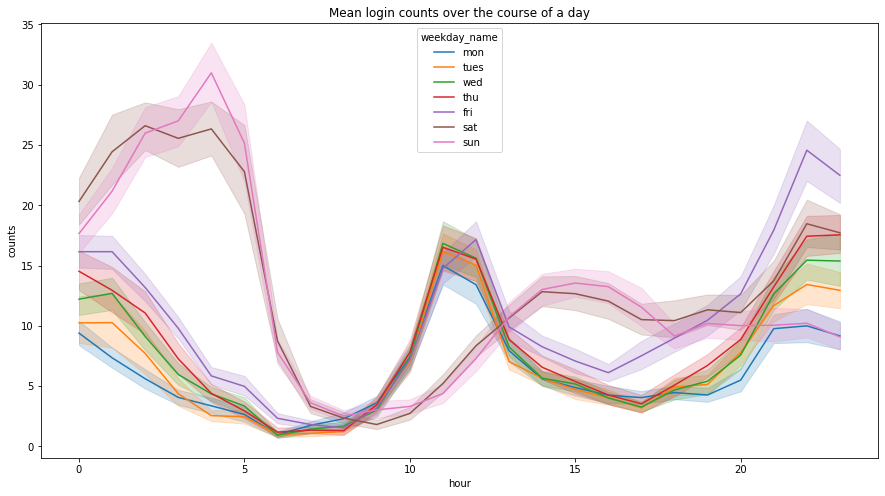

In [237]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=login_15min, x='hour', y='counts',
        hue='weekday_name', palette='tab10', hue_order=['mon', 'tues', 'wed', 'thu', 'fri', 'sat', 'sun'])

plt.title('Mean login counts over the course of a day')
plt.show()

In [228]:
def hour_of_week(x):
    week_hour = x.hour + (24*x.weekday)
    return week_hour

In [234]:
login_15min['hour_of_week'] = hour_of_week(login_15min)

In [239]:
login_15min.head()

,times,counts,month,day,weekday,hour,weekday_name,hour_of_week
0,1970-01-01 00:15:00,0,1,1,3,0,thu,72
1,1970-01-01 00:30:00,0,1,1,3,0,thu,72
2,1970-01-01 00:45:00,0,1,1,3,0,thu,72
3,1970-01-01 01:00:00,0,1,1,3,1,thu,73
4,1970-01-01 01:15:00,0,1,1,3,1,thu,73


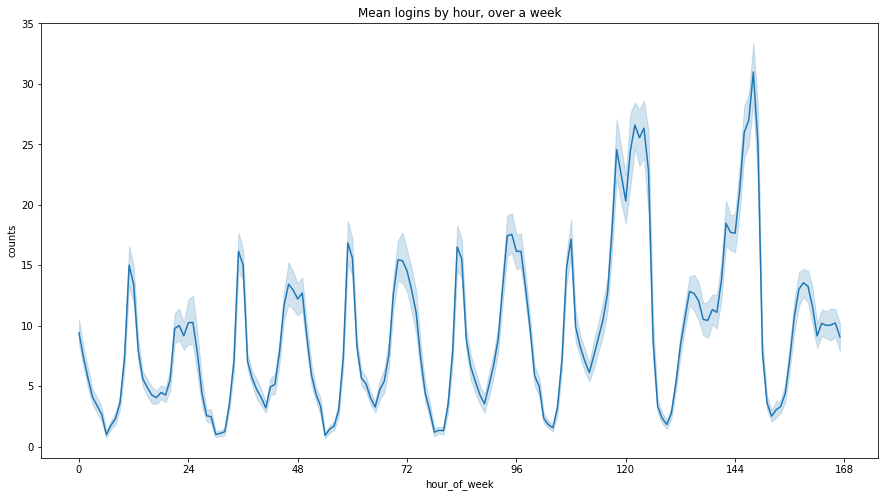

In [238]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=login_15min, x='hour_of_week', y='counts',
            )
plt.xticks(range(0,175,24))

plt.title('Mean logins by hour, over a week')
plt.show()

In [241]:
login_15min.head()

,times,counts,month,day,weekday,hour,weekday_name,hour_of_week
0,1970-01-01 00:15:00,0,1,1,3,0,thu,72
1,1970-01-01 00:30:00,0,1,1,3,0,thu,72
2,1970-01-01 00:45:00,0,1,1,3,0,thu,72
3,1970-01-01 01:00:00,0,1,1,3,1,thu,73
4,1970-01-01 01:15:00,0,1,1,3,1,thu,73


In [251]:
login_15min.groupby(['weekday', 'weekday_name']).sum().apply(lambda x: x/24).index.get_level_values('weekday_name')

Index(['mon', 'tues', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype='object', name='weekday_name')

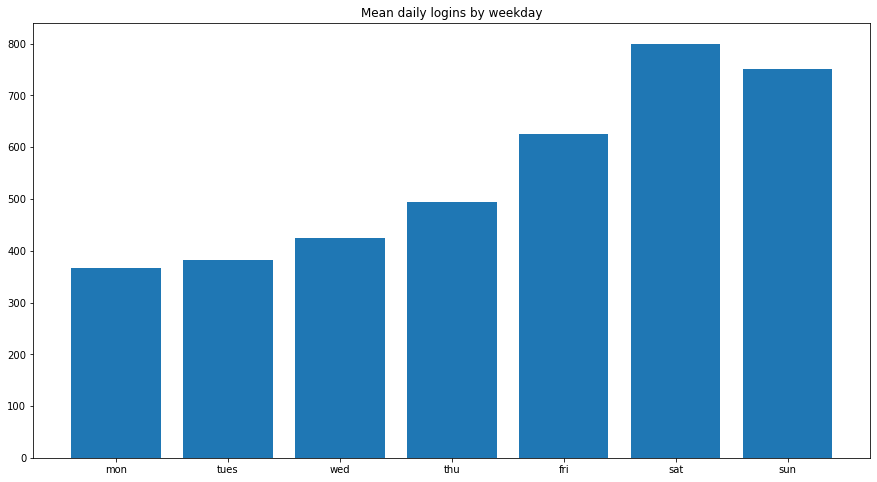

In [253]:
fig, ax = plt.subplots(figsize=(15, 8))

# sns.lineplot(data=login_15min.groupby(['weekday', 'weekday_name']).sum().apply(lambda x: x/24), 
#              x='weekday_name', y='counts',
# #         hue='weekday_name', palette='tab10', hue_order=['mon', 'tues', 'wed', 'thu', 'fri', 'sat', 'sun']
#             )

ax.bar(x = login_15min.groupby(['weekday', 'weekday_name']).sum().apply(lambda x: x/24).index.get_level_values('weekday_name'),
      height = login_15min.groupby(['weekday', 'weekday_name']).sum().apply(lambda x: x/24)['counts'])

plt.title('Mean daily logins by weekday')
plt.show()


define "weekend" as 8pm (20:00) Friday evening to 8pm (20:00) Sunday evening based on usage patterns

In [292]:
fri_8pm = 20+(4*24)
sun_8pm = 20+(6*24)
print(fri_8pm, sun_8pm)

116 164


In [298]:
login_15min['is_weekend'] = login_15min['hour_of_week'].apply(lambda x: fri_8pm <= x < sun_8pm)

In [299]:
login_15min.head()

,times,counts,month,day,weekday,hour,weekday_name,hour_of_week,is_weekend
0,1970-01-01 00:15:00,0,1,1,3,0,thu,72,False
1,1970-01-01 00:30:00,0,1,1,3,0,thu,72,False
2,1970-01-01 00:45:00,0,1,1,3,0,thu,72,False
3,1970-01-01 01:00:00,0,1,1,3,1,thu,73,False
4,1970-01-01 01:15:00,0,1,1,3,1,thu,73,False


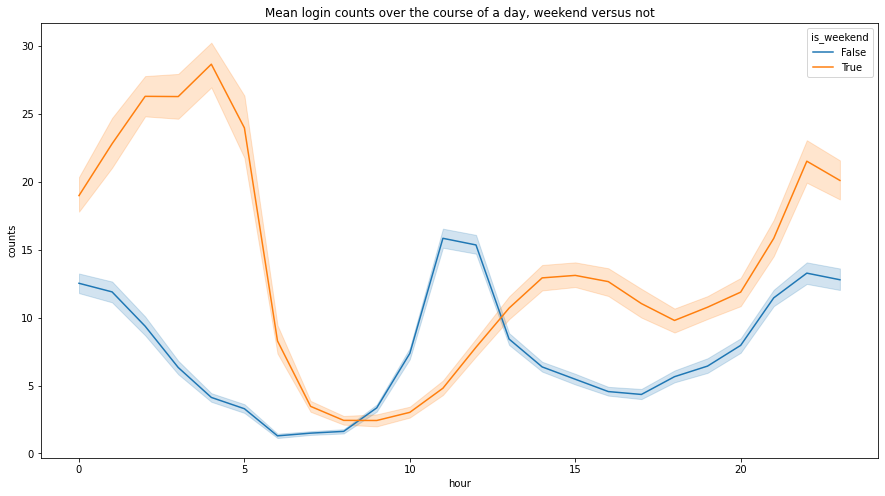

In [301]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=login_15min, x='hour', y='counts',
        hue='is_weekend', 
            )

plt.title('Mean login counts over the course of a day, weekend versus not')
plt.show()